# Test for model testing

## Experiment 3
Location test with stratification



In [3]:
import os
import numpy as np
import pandas as pd
# import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load in the imputed dataset

In [4]:
X = []
Y = []
title = []
coorDataLocation = "D:/Thesis/ELAR-Data/imputedArrayData/"
dirData = os.listdir(coorDataLocation)
for i, data in enumerate(dirData):
    if i % 2:
        continue
    coorLoad = np.loadtxt(coorDataLocation + data)
    coorShape= np.loadtxt(coorDataLocation + dirData[i + 1])
    try:
        coorLoad = coorLoad.reshape(coorLoad.shape[0], coorLoad.shape[1] // int(coorShape[2]), int(coorShape[2]))
    except:
        print(data, dirData[i + 1], coorLoad.shape, coorShape.shape)
    title.append(data)
    X.append(coorLoad)
len(X)

14058

#### Remove the .npy and replace .mp4

In [20]:
newTitle = []

for name in title:
    newName = name[:-4] + '.mp4'
    newTitle.append(newName)
title = np.array(newTitle)
len(title)

14058

#### Save OriginalX values

In [21]:
originalX = X
originalTitle = title
len(originalX)

14058

#### In case error ocured reload in x

In [22]:
X = originalX
title = originalTitle
len(X)

14058

# Load in the classifications

In [23]:
saveLocation = "D:/Thesis/Video-Auslan-sorted"
Locations = {}
for word in os.listdir(saveLocation):
    Locations[word] = None
    
f = open("keyBindsLocation.txt", "r")
line = f.readline()
while (line):
    try:
        if line.split("_|_")[1] == 'None\n':
            Locations[line.split("_|_")[0]] = None
        else:
            Locations[line.split("_|_")[0]] = line.split("_|_")[1]
    except:
        i = 1
    line = f.readline()
f.close()
Locations

{'ABOUT1': 'Hand\n',
 'ABOUT2': 'Neutral\n',
 'ABOUT2(7)': 'Neutral\n',
 'ABOUT2(B)': None,
 'ABOUT2(FALSE-START)': None,
 'ACCEPT': 'Chest\n',
 'ACCOMMODATION-2H': 'Neutral\n',
 'ACCURATE': 'Hand\n',
 'ACHIEVE': None,
 'ACTIVITY-THERE': 'Neutral\n',
 'ADULT': None,
 'AFRAID': 'Chest\n',
 'AFTERNOON': 'Chin\n',
 'AFTERNOON3': None,
 'AFTERNOON4': 'Chin\n',
 'AGAIN': 'Neutral\n',
 'AGAIN(8)': None,
 'AGAIN-2H': None,
 'AGAIN-AND-AGAIN': 'Neutral\n',
 'AGES': 'Wrist\n',
 'AGREE': 'Hand\n',
 'AIM': 'Hand\n',
 'ALIVE': None,
 'ALL': 'Neutral\n',
 'ALL-2H': 'Neutral\n',
 'ALL-DAY': 'Neutral\n',
 'ALL-DAY-2H': 'Neutral\n',
 'ALL-DAY-LONG': 'Neutral\n',
 'ALLOW': None,
 'ALMOST': 'Chin\n',
 'ALMOST(FLATGO)': None,
 'ALMOST-2H': None,
 'ALRIGHT': 'Ear\n',
 'ALRIGHT-2H': 'Neutral\n',
 'ALRIGHT2': 'Neutral\n',
 'ALWAYS': 'Ear\n',
 'ALWAYS1': 'Ear\n',
 'ALWAYS2': None,
 'AMERINDIAN': 'Head\n',
 'AMERINDIAN(FALSE START)': None,
 'AMERINDIAN2': 'Mouth\n',
 'AMERINDIAN2(FALSE START)': None,
 'AND-TH

# See what percentage of words have a Classification

In [24]:
print(len(Locations.items()))
print(len([i for i in Locations.values() if not i == None]))


1972
1134


## Load in usability

In [25]:
usability = {}

f = open("useability.txt", "r")
line = f.readline()
while (line):
    try:
        if line.split("_|_")[1] == 'None\n':
            usability[line.split("_|_")[0]] = None
        else:
            usability[line.split("_|_")[0]] = int(line.split("_|_")[1])
    except:
        if line != '\n':
            print(line)
    line = f.readline()
f.close()
usability

{'ABOUT1_BFSA1c2a_1630_1990.mp4': 0,
 'ABOUT1_BRCA1c2a_27365_27645.mp4': 0,
 'ABOUT1_BRCA1c2a_29505_29985.mp4': 0,
 'ABOUT1_SBS1A3c7a_950_1280.mp4': 3,
 'ABOUT2_AAPB2c7a_310_800.mp4': 2,
 'ABOUT2_AJPB1c2b_2490_2650.mp4': 0,
 'ABOUT2_AJPB2c7a_1135_2270.mp4': 3,
 'ABOUT2_AMGA1c2a_1580_1820.mp4': 1,
 'ABOUT2_AMGA1c2a_730_1170.mp4': 3,
 'ABOUT2_AMW2A1c2b_890_1020.mp4': 1,
 'ABOUT2_BCHA2c7a_4470_5330.mp4': 0,
 'ABOUT2_BCHA2c7a_5750_6050.mp4': 0,
 'ABOUT2_BDLA1c2a_1800_2290.mp4': 0,
 'ABOUT2_BMKB2c7a_1010_1700.mp4': 4,
 'ABOUT2_BRCA1c2a_9460_9980.mp4': 0,
 'ABOUT2_MBHA1c2a_4750_5175.mp4': 4,
 'ABOUT2_MFKA1c2a_6180_6460.mp4': 2,
 'ABOUT2_MGCA1c2b_4880_5510.mp4': 4,
 'ABOUT2_MGCA1c2b_52725_53635.mp4': 4,
 'ABOUT2_MGCA1c2b_5840_6150.mp4': 2,
 'ABOUT2_MTDBA2c7a_1290_2190.mp4': 4,
 'ABOUT2_PGMB1c2a_1230_2110.mp4': 4,
 'ABOUT2_PJEB1c2a_2500_3100.mp4': 4,
 'ABOUT2_PNAA1c2b_1880_2660.mp4': 4,
 'ABOUT2_SBS1A1c2b_7320_7630.mp4': 2,
 'ABOUT2_SPKA1c2a_171110_171409.mp4': 1,
 'ABOUT2_STMB1c2a_13650_13800

## Primary Movement KeyBind.txt -> int

In [26]:
label_keys = {"Head\n":0, "Eye\n":1, "Forehead\n":2, "Nose\n":3, 
              "Ear\n":4, "Mouth\n":5, "Chin\n":6, 
              "Neck\n":7, "Shoulders\n":8, 
              "ArmPit\n":9, "Chest\n":10, "Waist\n": 11,
              "Back\n":12, "Thigh\n":13, "Stomach\n": 14,
              "Arm\n":15, "Wrist\n":16, "Hand\n": 17,
              "Neutral\n": 18}
label_keys

{'Head\n': 0,
 'Eye\n': 1,
 'Forehead\n': 2,
 'Nose\n': 3,
 'Ear\n': 4,
 'Mouth\n': 5,
 'Chin\n': 6,
 'Neck\n': 7,
 'Shoulders\n': 8,
 'ArmPit\n': 9,
 'Chest\n': 10,
 'Waist\n': 11,
 'Back\n': 12,
 'Thigh\n': 13,
 'Stomach\n': 14,
 'Arm\n': 15,
 'Wrist\n': 16,
 'Hand\n': 17,
 'Neutral\n': 18}

# Assign each data point to a classification
## Each of these will be classified to X and Y

In [27]:
coorDataLocation = "D:/Thesis/ELAR-Data/imputedArrayData/"
dirData = os.listdir(coorDataLocation)
videoWord = []
for i, data in enumerate(dirData):
    if i % 2:
        continue
    try:
        videoWord.append(label_keys[Locations[data.split("_")[0]]])
    except:
        videoWord.append(99) 
videoWord

[17,
 17,
 18,
 99,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 10,
 18,
 17,
 17,
 17,
 99,
 99,
 99,
 18,
 99,
 10,
 10,
 99,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 99,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 16,
 16,
 16,
 17,
 17,
 17,
 17,
 17,
 99,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 99,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 99,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 18,
 18,
 18,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,

## Append X values with a Y data label

In [28]:
newX = []
newTitle = []
Y = []
print(len(X), len(videoWord))
for i, y in enumerate(videoWord):
    # 99 was assigned if an error occured when importing and 11 is for unknown datalabels
    if y != 99:
        newX.append(X[i])
        newTitle.append(title[i])
        Y.append(y)
X = newX
title = np.array(newTitle)
print(len(X), len(title))

14058 14058
13052 13052


## Remove X and Y that are low usability

In [29]:
print(len(X),len(Y))
newX = []
newY = []
for i in range(len(X)):
    try:
        if usability[title[i]] >= 3:
            newX.append(X[i])
            newY.append(Y[i])
    except:
        print(title[i])
X = np.array(newX)
Y = np.array(newY)
print(len(X),len(Y))

13052 13052
5792 5792


## check shape of data

In [30]:
newX = []
newY = []
for i in range(len(X)):
    try:
        if X[i].shape[1] == 33 or X[i].shape[2] == 3:
            newX.append(X[i])
            newY.append(Y[i])
    except:
        continue
X = np.array(newX)
Y = np.array(newY)

In [31]:
print(len(X), len(Y), len(originalX))
print(X.shape)

5792 5792 14058
(5792, 40, 33, 3)


# Reshape insto 1d shape

In [32]:
newX = []
for i in range(len(X)):
    newInfo = []
    for frame in X[i]:
        for joint in frame:
            for coor in joint:
                newInfo.append(coor)
    newX.append(newInfo)
X = np.array(newX)
print(X.shape)

(5792, 3960)


## Create Training Splits

In [33]:
import random

# Random state
seed_value = 42  
random.seed(seed_value)

# Choose the test size
pick = False
yCount = {}

maxClassificationAmount = 100

unique_classes, counts = np.unique(Y, return_counts=True)
# set up random picking
picked = {i:0 for i in range(len(X))}
Yset = set(Y)
uniqueYs = len(Yset)

# Randomly add and even amoung of training data based off test size
Ordered_X_train, Ordered_y_train = [], []
for classification in range(len(counts)):
    if counts[classification] <= maxClassificationAmount:
        for index, x in enumerate(X):
            if Y[index] == classification: 
                picked[index] = 1
                Ordered_X_train.append(x)
                Ordered_y_train.append(classification)
    else:
        num_added = 0
        while True:
            if num_added >= maxClassificationAmount:
                break
            index = np.random.randint(0, len(Y) - 1)
            if picked[index] == 0 and Y[index] == classification:
                picked[index] = 1
                Ordered_X_train.append(X[index])
                Ordered_y_train.append(classification)
                num_added += 1

X_test, y_test = [], []
for index in range(len(X)):
    if picked[index] == 0:
        X_test.append(X[index])
        y_test.append(Y[index])

# Randomly order training:
X_train, y_train = [],[]
pickedReorder = {i:0 for i in range(len(Ordered_y_train))}
print(len(pickedReorder.values()))
index = np.random.randint(0, len(Ordered_y_train) - 1)
num = 0
while(np.prod(list(pickedReorder.values())) == 0):
    while pickedReorder[index] == 1:
        index = random.randint(0, len(Ordered_y_train) - 1)
    pickedReorder[index] = 1
    X_train.append(Ordered_X_train[index])
    y_train.append(Ordered_y_train[index])
    num += 1
print("Training set created")

1284
Training set created


## Add one more value to back class so that it can train some models

In [34]:
for index in range(len(Y)):
    if Y[index] == 12:
        X_train.append(X[index])
        y_train.append(Y[index])

## Save Text

In [79]:
# Save Data
np.savetxt("experiment4/X_train.npy", X_train)
np.savetxt("experiment4/X_test.npy", X_test)
np.savetxt("experiment4/y_train.npy", y_train)
np.savetxt("experiment4/y_test.npy", y_test)

# Data Analysis

In [80]:
import pandas as pd
unique_classes, counts = np.unique(y_train, return_counts=True)

invs_label_key = {label_keys[key]: key for key in label_keys.keys()}
class_counts_df = pd.DataFrame({'Class': [invs_label_key[i][:-1] for i in unique_classes], 'Count': counts})

for label, count in zip(unique_classes, counts):
    print(f"Class {invs_label_key[label][:-1]}: {count} samples")
class_counts_df

Class Head: 93 samples
Class Eye: 100 samples
Class Forehead: 67 samples
Class Nose: 73 samples
Class Ear: 100 samples
Class Mouth: 100 samples
Class Chin: 100 samples
Class Neck: 28 samples
Class Shoulders: 19 samples
Class ArmPit: 33 samples
Class Chest: 100 samples
Class Waist: 100 samples
Class Back: 2 samples
Class Thigh: 4 samples
Class Stomach: 26 samples
Class Arm: 40 samples
Class Wrist: 100 samples
Class Hand: 100 samples
Class Neutral: 100 samples


,Class,Count
0,Head,93
1,Eye,100
2,Forehead,67
3,Nose,73
4,Ear,100
5,Mouth,100
6,Chin,100
7,Neck,28
8,Shoulders,19
9,ArmPit,33


## Linear Discriminant Analysis
Quadratic discriminant analysis is a classification problem represented by a Bayes Probability distribution 

In [81]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# data to manipulate
ldas = []
for solver in ['svd', 'lsqr']:
    lda = LinearDiscriminantAnalysis(solver=solver)
    lda.fit(X_train, y_train)
    ldas.append(lda)
    print('\n', solver)
    # Error calculation
    print("training acuracy: ", lda.score(X_train, y_train))
    print("validation acuracy: ", lda.score(X_test, y_test))
    print("training error: ", 1 - lda.score(X_train, y_train))
    print("validation error: ", 1 - lda.score(X_test, y_test))


 svd
training acuracy:  0.9813229571984435
validation acuracy:  0.12555456965394854
training error:  0.018677042801556465
validation error:  0.8744454303460515

 lsqr
training acuracy:  0.0015564202334630351
validation acuracy:  0.0013309671694764862
training error:  0.998443579766537
validation error:  0.9986690328305236


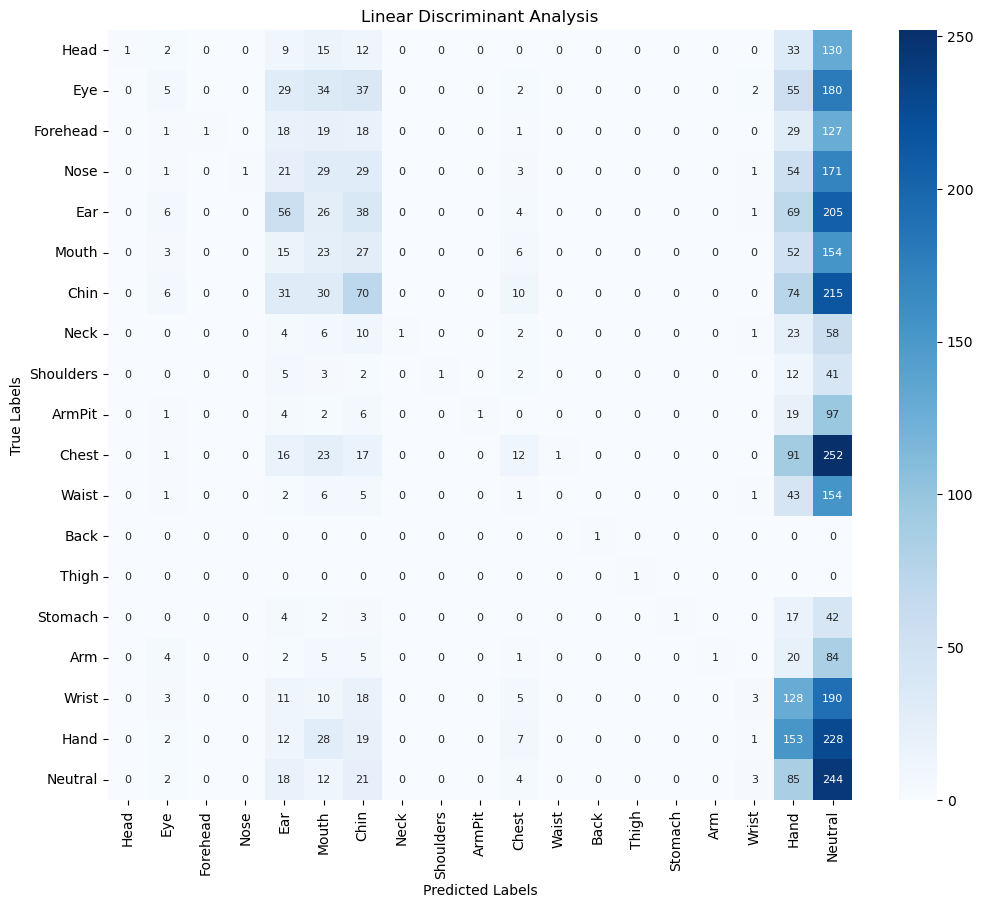

In [82]:
from sklearn import metrics
from sklearn.metrics import classification_report
import seaborn as sns
inverted_label_keys = dict(map(reversed, label_keys.items()))
label = [inverted_label_keys[i][:-1] for i in range(19)]

y_pred = ldas[0].predict(X_test)
y_true = y_test.copy()

numberLabel = np.arange(19)

if not set(numberLabel).issubset(set(y_test)):
    missing_class = list(set(numberLabel) - set(y_test))
    y_true = np.concatenate((y_true, missing_class))
    y_pred = np.concatenate((y_pred, missing_class))

cm = metrics.confusion_matrix(y_pred, y_true)
plt.figure(figsize=(12,10))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 8}, xticklabels=label, yticklabels=label)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Linear Discriminant Analysis')
plt.show()

## Quadratic Discriminant Analysis
Quadratic discriminant analysis is a classification problem represented by a Bayes Probability distribution 

In [83]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
# Error calculation
print("training acuracy: ", qda.score(X_train, y_train))
print("validation acuracy: ", qda.score(X_test, y_test))
print("training error: ", 1 - qda.score(X_train, y_train))
print("validation error: ", 1 - qda.score(X_test, y_test))

c:\Users\KAI\.conda\envs\ml\lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\KAI\.conda\envs\ml\lib\site-packages\sklearn\discriminant_analysis.py:951: RuntimeWarning: divide by zero encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
c:\Users\KAI\.conda\envs\ml\lib\site-packages\sklearn\discriminant_analysis.py:951: RuntimeWarning: invalid value encountered in multiply
  X2 = np.dot(Xm, R * (S ** (-0.5)))
c:\Users\KAI\.conda\envs\ml\lib\site-packages\sklearn\discriminant_analysis.py:954: RuntimeWarning: divide by zero encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])


training acuracy:  0.0015564202334630351


c:\Users\KAI\.conda\envs\ml\lib\site-packages\sklearn\discriminant_analysis.py:951: RuntimeWarning: divide by zero encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
c:\Users\KAI\.conda\envs\ml\lib\site-packages\sklearn\discriminant_analysis.py:951: RuntimeWarning: invalid value encountered in multiply
  X2 = np.dot(Xm, R * (S ** (-0.5)))
c:\Users\KAI\.conda\envs\ml\lib\site-packages\sklearn\discriminant_analysis.py:954: RuntimeWarning: divide by zero encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])


validation acuracy:  0.0


c:\Users\KAI\.conda\envs\ml\lib\site-packages\sklearn\discriminant_analysis.py:951: RuntimeWarning: divide by zero encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
c:\Users\KAI\.conda\envs\ml\lib\site-packages\sklearn\discriminant_analysis.py:951: RuntimeWarning: invalid value encountered in multiply
  X2 = np.dot(Xm, R * (S ** (-0.5)))
c:\Users\KAI\.conda\envs\ml\lib\site-packages\sklearn\discriminant_analysis.py:954: RuntimeWarning: divide by zero encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])


training error:  0.998443579766537


c:\Users\KAI\.conda\envs\ml\lib\site-packages\sklearn\discriminant_analysis.py:951: RuntimeWarning: divide by zero encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
c:\Users\KAI\.conda\envs\ml\lib\site-packages\sklearn\discriminant_analysis.py:951: RuntimeWarning: invalid value encountered in multiply
  X2 = np.dot(Xm, R * (S ** (-0.5)))


validation error:  1.0


c:\Users\KAI\.conda\envs\ml\lib\site-packages\sklearn\discriminant_analysis.py:954: RuntimeWarning: divide by zero encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])


c:\Users\KAI\.conda\envs\ml\lib\site-packages\sklearn\discriminant_analysis.py:951: RuntimeWarning: divide by zero encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
c:\Users\KAI\.conda\envs\ml\lib\site-packages\sklearn\discriminant_analysis.py:951: RuntimeWarning: invalid value encountered in multiply
  X2 = np.dot(Xm, R * (S ** (-0.5)))
c:\Users\KAI\.conda\envs\ml\lib\site-packages\sklearn\discriminant_analysis.py:954: RuntimeWarning: divide by zero encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])


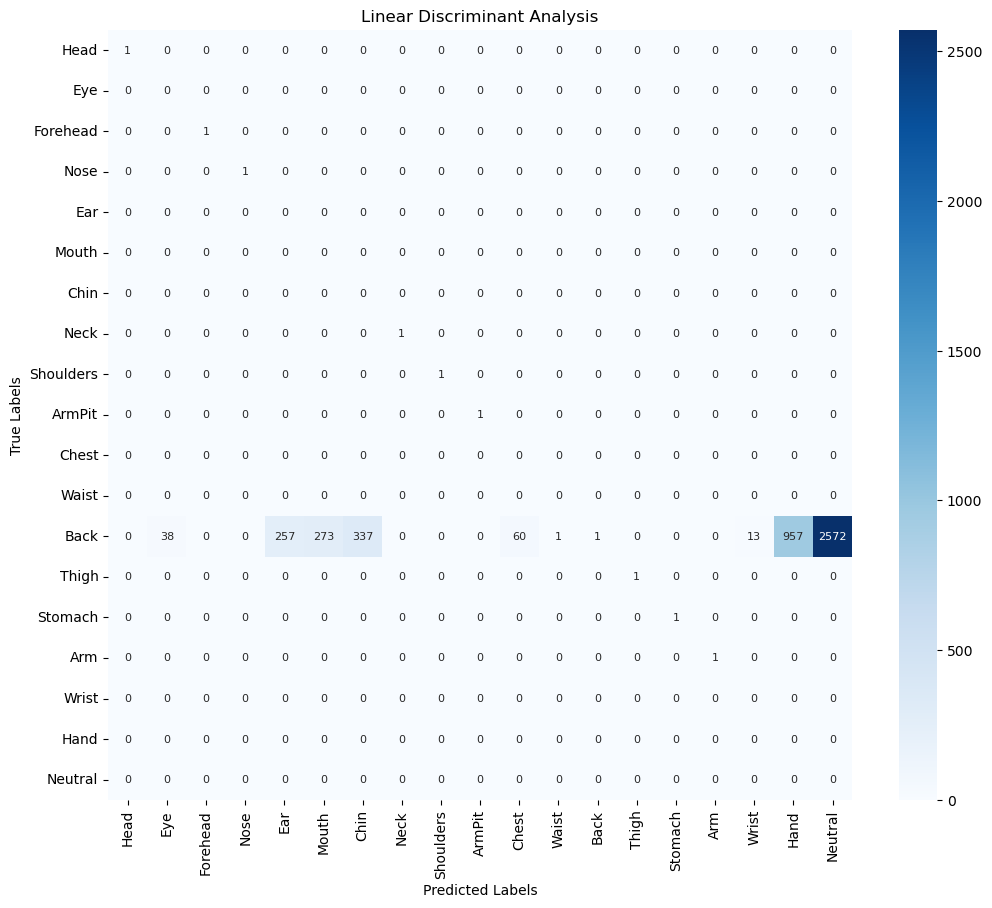

In [84]:
from sklearn import metrics
from sklearn.metrics import classification_report
import seaborn as sns
inverted_label_keys = dict(map(reversed, label_keys.items()))
label = [inverted_label_keys[i][:-1] for i in range(19)]

y_pred = qda.predict(X_test)
y_true = y_test.copy()

numberLabel = np.arange(19)

if not set(numberLabel).issubset(set(y_test)):
    missing_class = list(set(numberLabel) - set(y_test))
    y_true = np.concatenate((y_true, missing_class))
    y_pred = np.concatenate((y_pred, missing_class))

cm = metrics.confusion_matrix(y_pred, y_true)
plt.figure(figsize=(12,10))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 8}, xticklabels=label, yticklabels=label)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Linear Discriminant Analysis')
plt.show()

## Gaussian Naive Bayes
models each as conforming to a Gaussian (normal) distribution

In [85]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)

print("training acuracy: ", gnb.score(X_train, y_train))
print("validation acuracy: ", gnb.score(X_test, y_test))
print("training error: ", 1 - gnb.score(X_train, y_train))
print("validation error: ", 1 - gnb.score(X_test, y_test))


training acuracy:  0.19688715953307392
validation acuracy:  0.029059449866903283
training error:  0.8031128404669261
validation error:  0.9709405501330968


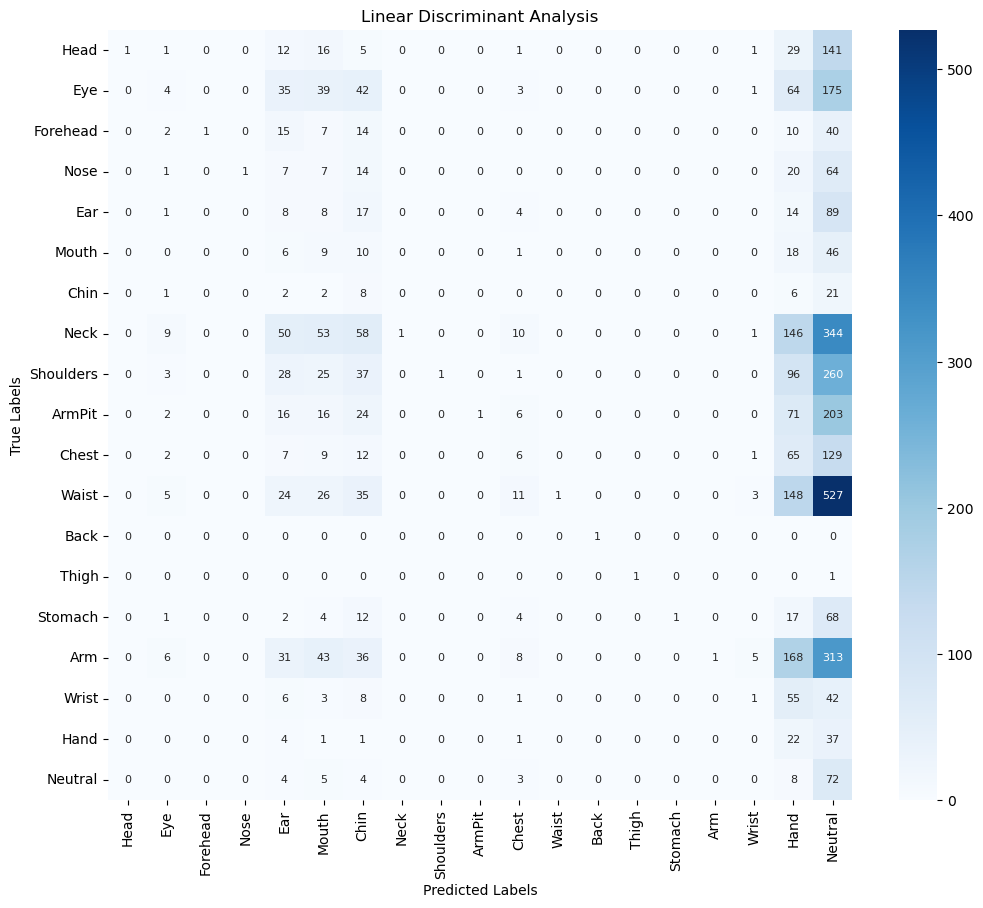

In [88]:
from sklearn import metrics
from sklearn.metrics import classification_report
import seaborn as sns
inverted_label_keys = dict(map(reversed, label_keys.items()))
label = [inverted_label_keys[i][:-1] for i in range(19)]

y_pred = gnb.predict(X_test)
y_true = y_test.copy()

numberLabel = np.arange(19)

if not set(numberLabel).issubset(set(y_test)):
    missing_class = list(set(numberLabel) - set(y_test))
    y_true = np.concatenate((y_true, missing_class))
    y_pred = np.concatenate((y_pred, missing_class))

cm = metrics.confusion_matrix(y_pred, y_true)
plt.figure(figsize=(12,10))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 8}, xticklabels=label, yticklabels=label)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Linear Discriminant Analysis')
plt.show()

## KNeighbors Classifier
Classifier implementing the k-nearest neighbors vote.

In [89]:
from sklearn.neighbors import KNeighborsClassifier
bottom = 0
top = 31
step = 5
predictClass = []
kNeighborsPredictions = []
for weight in ['uniform', 'distance']:
    for i in range(bottom, top,step):
        if i == 0:
            clf = KNeighborsClassifier(n_neighbors=1, weights=weight)
        else:
            clf = KNeighborsClassifier(n_neighbors=i, weights=weight)
        clf.fit(X_train, y_train)
        kNeighborsPredictions.append(clf)
    for neigh in kNeighborsPredictions:
        print(neigh)
        # Error calculation
        print("training acuracy: ", neigh.score(X_train, y_train))
        print("validation acuracy: ", neigh.score(X_test, y_test))
        print("training error: ", 1 - neigh.score(X_train, y_train))
        print("validation error: ", 1- neigh.score(X_test, y_test))
        print("\n")



KNeighborsClassifier(n_neighbors=1)
training acuracy:  1.0
validation acuracy:  0.12422360248447205
training error:  0.0
validation error:  0.8757763975155279


KNeighborsClassifier()
training acuracy:  0.4365758754863813
validation acuracy:  0.08473824312333629
training error:  0.5634241245136187
validation error:  0.9152617568766637


KNeighborsClassifier(n_neighbors=10)
training acuracy:  0.3470817120622568
validation acuracy:  0.0862910381543922
training error:  0.6529182879377432
validation error:  0.9137089618456078


KNeighborsClassifier(n_neighbors=15)
training acuracy:  0.30116731517509726
validation acuracy:  0.08895297249334516
training error:  0.6988326848249027
validation error:  0.9110470275066549


KNeighborsClassifier(n_neighbors=20)
training acuracy:  0.27782101167315176
validation acuracy:  0.09183673469387756
training error:  0.7221789883268482
validation error:  0.9081632653061225


KNeighborsClassifier(n_neighbors=25)
training acuracy:  0.267704280155642
validation

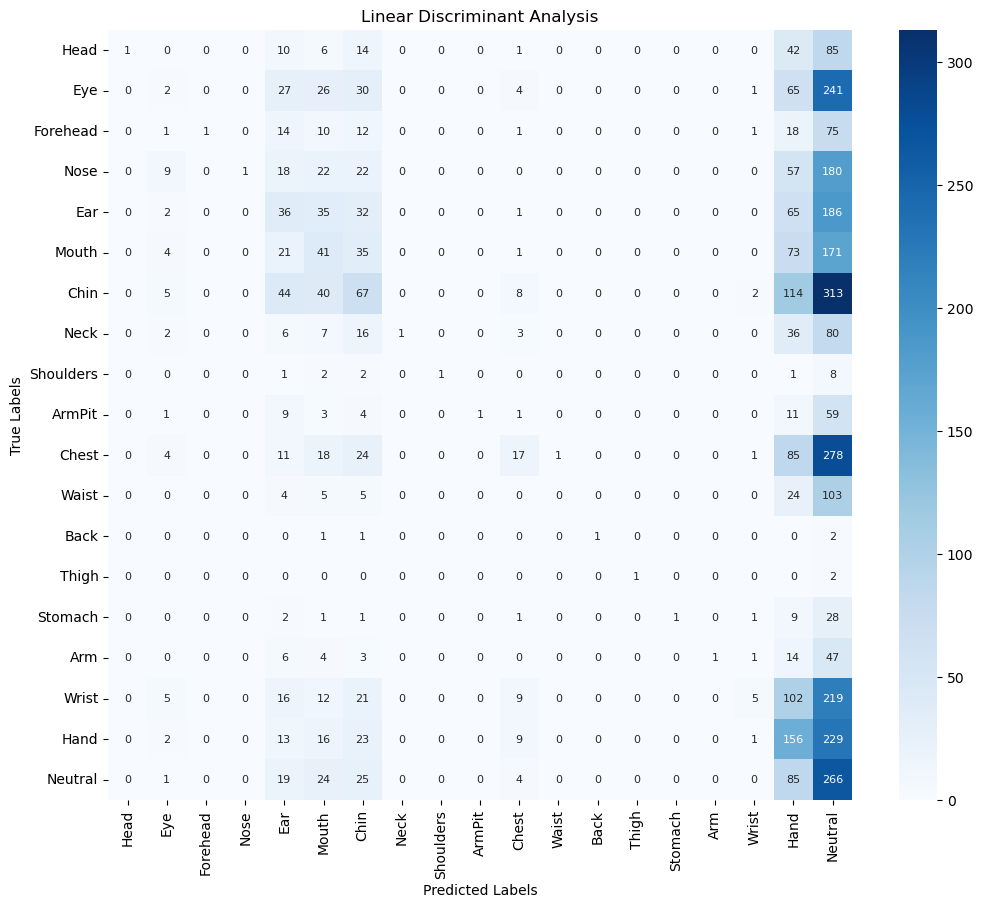

In [91]:
from sklearn import metrics
import seaborn as sns
inverted_label_keys = dict(map(reversed, label_keys.items()))
label = [inverted_label_keys[i][:-1] for i in range(19)]

knn = KNeighborsClassifier(n_neighbors=5, weights='distance')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
y_true = y_test.copy()

numberLabel = np.arange(19)

if not set(numberLabel).issubset(set(y_test)):
    missing_class = list(set(numberLabel) - set(y_test))
    y_true = np.concatenate((y_true, missing_class))
    y_pred = np.concatenate((y_pred, missing_class))

cm = metrics.confusion_matrix(y_pred, y_true)
plt.figure(figsize=(12,10))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 8}, xticklabels=label, yticklabels=label)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Linear Discriminant Analysis')
plt.show()

## DecisionTreeClassifier
A decision tree classifier.

In [92]:
from sklearn.tree import DecisionTreeClassifier
for criteria in ["gini", "entropy", "log_loss"]:
    for splitter in ["best", "random"]:
        deTree = DecisionTreeClassifier(criterion=criteria, splitter=splitter, max_depth=10, min_samples_split=10)
        print('criteria: ', criteria, 'splitter: ', splitter)
        deTree.fit(X_train, y_train)

        print("training acuracy: ", deTree.score(X_train, y_train))
        print("validation acuracy: ", deTree.score(X_test, y_test))
        print("training error: ", 1 - deTree.score(X_train, y_train))
        print("validation error: ", 1- deTree.score(X_test, y_test))


criteria:  gini splitter:  best
training acuracy:  0.5688715953307393
validation acuracy:  0.09893522626441881
training error:  0.4311284046692607
validation error:  0.9010647737355812
criteria:  gini splitter:  random
training acuracy:  0.535408560311284
validation acuracy:  0.10891748003549245
training error:  0.46459143968871597
validation error:  0.8910825199645076
criteria:  entropy splitter:  best
training acuracy:  0.7182879377431907
validation acuracy:  0.15239574090505767
training error:  0.28171206225680934
validation error:  0.8476042590949423
criteria:  entropy splitter:  random
training acuracy:  0.6856031128404669
validation acuracy:  0.14219165927240462
training error:  0.31439688715953307
validation error:  0.8578083407275954
criteria:  log_loss splitter:  best
training acuracy:  0.7182879377431907
validation acuracy:  0.1484028393966282
training error:  0.28171206225680934
validation error:  0.8515971606033718
criteria:  log_loss splitter:  random
training acuracy:  0.

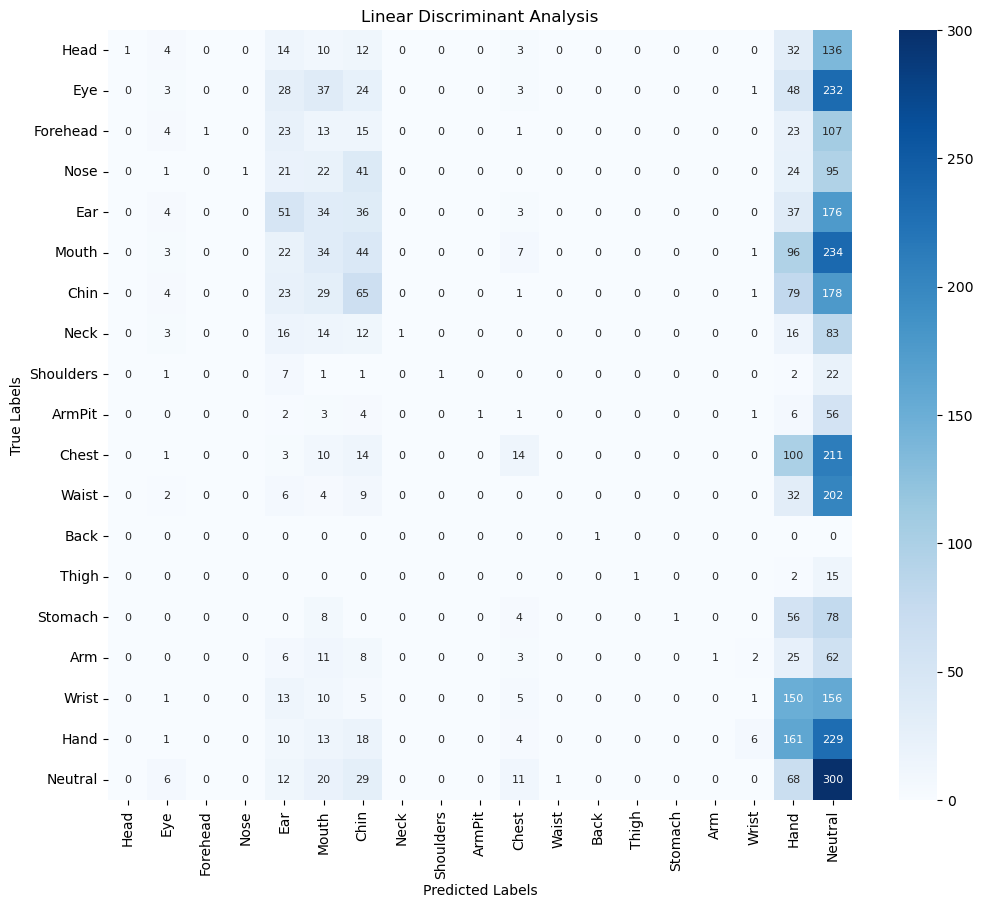

In [93]:
from sklearn import metrics
import seaborn as sns
inverted_label_keys = dict(map(reversed, label_keys.items()))
label = [inverted_label_keys[i][:-1] for i in range(19)]

deTree = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=10, min_samples_split=10)
deTree.fit(X_train, y_train)
y_pred = deTree.predict(X_test)
y_true = y_test.copy()

numberLabel = np.arange(19)

if not set(numberLabel).issubset(set(y_test)):
    missing_class = list(set(numberLabel) - set(y_test))
    y_true = np.concatenate((y_true, missing_class))
    y_pred = np.concatenate((y_pred, missing_class))

cm = metrics.confusion_matrix(y_pred, y_true)
plt.figure(figsize=(12,10))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 8}, xticklabels=label, yticklabels=label)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Linear Discriminant Analysis')
plt.show()

## RandomForestClassifier
A random forest classifier.

In [94]:
from sklearn.ensemble import RandomForestClassifier
rfcs = []
for criteria in ["gini", "entropy", "log_loss"]:
    rfc = RandomForestClassifier(criterion=criteria, min_samples_split=10, max_depth=8)
    rfc.fit(X_train, y_train)
    rfcs.append(rfc)
    print(rfc, criteria)
    print("training acuracy: ", rfc.score(X_train, y_train))
    print("validation acuracy: ", rfc.score(X_test, y_test))
    print("training error: ", 1 - rfc.score(X_train, y_train))
    print("validation error: ", 1- rfc.score(X_test, y_test))

RandomForestClassifier(max_depth=8, min_samples_split=10) gini
training acuracy:  0.7665369649805448
validation acuracy:  0.17812777284826975
training error:  0.2334630350194552
validation error:  0.8218722271517303
RandomForestClassifier(criterion='entropy', max_depth=8, min_samples_split=10) entropy
training acuracy:  0.9688715953307393
validation acuracy:  0.20408163265306123
training error:  0.0311284046692607
validation error:  0.7959183673469388
RandomForestClassifier(criterion='log_loss', max_depth=8, min_samples_split=10) log_loss
training acuracy:  0.9603112840466926
validation acuracy:  0.21095829636202307
training error:  0.03968871595330736
validation error:  0.7890417036379769


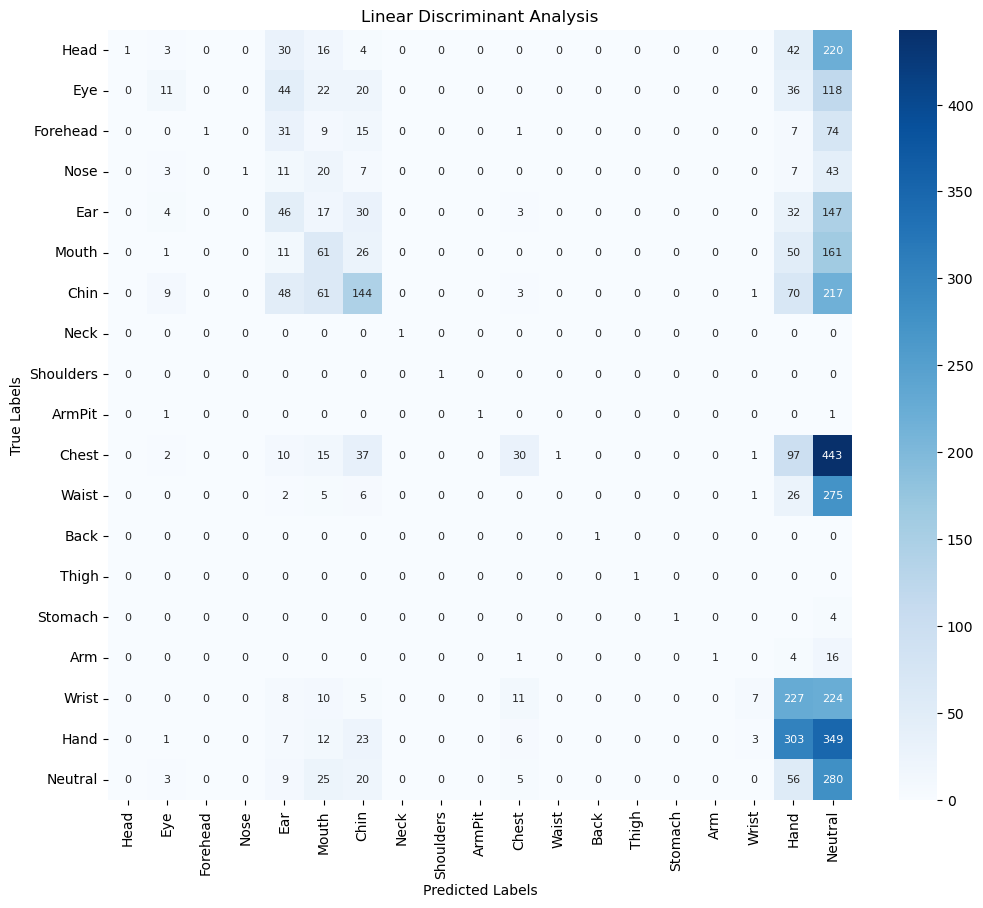

In [95]:
from sklearn import metrics
import seaborn as sns
inverted_label_keys = dict(map(reversed, label_keys.items()))
label = [inverted_label_keys[i][:-1] for i in range(19)]

rfc = RandomForestClassifier(criterion='log_loss', min_samples_split=10, max_depth=8)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
y_true = y_test.copy()

numberLabel = np.arange(19)

if not set(numberLabel).issubset(set(y_test)):
    missing_class = list(set(numberLabel) - set(y_test))
    y_true = np.concatenate((y_true, missing_class))
    y_pred = np.concatenate((y_pred, missing_class))

cm = metrics.confusion_matrix(y_pred, y_true)
plt.figure(figsize=(12,10))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 8}, xticklabels=label, yticklabels=label)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Linear Discriminant Analysis')
plt.show()

# Save Model

In [35]:
import pickle

In [36]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(solver='svd')
lda.fit(X_train, y_train)
with open('./experiment4/LDA.pkl', 'wb') as file:
    pickle.dump(lda, file)

In [37]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
with open('./experiment4/QDA.pkl', 'wb') as file:
    pickle.dump(qda, file)

c:\Users\KAI\.conda\envs\ml\lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [38]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
with open('./experiment4/GNB.pkl', 'wb') as file:
    pickle.dump(gnb, file)

In [39]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, weights='distance')
knn.fit(X_train, y_train)
with open('./experiment4/KNN.pkl', 'wb') as file:
    pickle.dump(knn, file)

In [40]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=10, min_samples_split=10)
dtc.fit(X_train, y_train)
with open('./experiment4/DTC.pkl', 'wb') as file:
    pickle.dump(dtc, file)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(criterion='log_loss', min_samples_split=10, max_depth=8)
rfc.fit(X_train, y_train)
with open('./experiment4/RFC.pkl', 'wb') as file:
    pickle.dump(rfc, file)